# Hull-White Model: Theory and Implementation

## Introduction
The Hull-White model is a popular **short-rate model** used to describe the evolution of interest rates. It assumes that the short rate follows a mean-reverting stochastic process:

$$ dr_t = \lambda (\theta(t) - r_t) dt + \eta dW_t $$

where:
- $\lambda$ is the speed of mean reversion
- $\theta(t)$ is the long-term mean level of the short rate
- $\eta$ is the volatility of the interest rate
- $dW_t$ is a Wiener process (Brownian motion)

## Function Definitions

### 1. Forward Rate Calculation
The instantaneous forward rate $ f(0,T) $ is given by:

$$ f(0,T) = - \frac{d}{dT} \log P(0,T) $$

where $P(0,T)$ is the **zero-coupon bond (ZCB) price** at time $T$.

```python
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def f0T(t, P0T):
    dt = 0.01    
    expr = - (np.log(P0T(t+dt))-np.log(P0T(t-dt)))/(2*dt)
    return expr
```

### 2. Hull-White Model Simulation
Using Euler-Maruyama discretization, we simulate the short rate process.

#### Discretized Form:
For time step $ i $:

$$ r_{i+1} = r_i + \lambda(\theta(t_i) - r_i) dt + \eta \cdot (W_{i+1} - W_i) $$

The money market account evolves as:

$$ M_{i+1} = M_i \cdot \exp\left(\frac{r_{i+1} + r_i}{2} dt\right) $$

```python
def GeneratePathsHWEuler(NoOfPaths, NoOfSteps, T, P0T, lambd, eta):    
    r0 = f0T(0.01, P0T)
    
    theta = lambda t: (1.0/lambd) * (f0T(t+0.01,P0T)-f0T(t-0.01,P0T))/(2.0*0.01) + f0T(t,P0T) + (eta**2/(2.0*lambd**2))*(1.0 - np.exp(-2.0*lambd*t))
    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
    R = np.zeros([NoOfPaths, NoOfSteps+1])
    M = np.zeros([NoOfPaths, NoOfSteps+1])
    M[:,0]= 1.0
    R[:,0]= r0
    time = np.zeros([NoOfSteps+1])
    
    dt = T / float(NoOfSteps)
    for i in range(0, NoOfSteps):
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.sqrt(dt) * Z[:,i]
        R[:,i+1] = R[:,i] + lambd*(theta(time[i]) - R[:,i]) * dt + eta* (W[:,i+1]-W[:,i])
        M[:,i+1] = M[:,i] * np.exp((R[:,i+1]+R[:,i])*0.5*dt)
        time[i+1] = time[i] +dt
    
    paths = {"time":time, "R":R, "M":M}
    return paths
```

### 3. Zero-Coupon Bond Pricing
We use the **affine solution** of the Hull-White model to compute bond prices.

#### Affine Coefficients:

$$ B(\tau) = \frac{1}{\lambda} (1 - e^{-\lambda \tau}) $$

$$ A(T_1, T_2) = \lambda \int_0^{T_2-T_1} \theta(T_2 - u) B(u) du + \frac{\eta^2}{4 \lambda^3} \left( e^{-2\lambda(T_2 - T_1)} (4 e^{\lambda(T_2 - T_1)} -1) -3 \right) + \frac{\eta^2}{2 \lambda^2} (T_2 - T_1) $$

```python
def HW_theta(lambd, eta, P0T):
    dt = 0.01    
    return lambda t: (1.0/lambd) * (f0T(t+dt,P0T)-f0T(t-dt,P0T))/(2.0*dt) + f0T(t,P0T) + (eta**2/(2.0*lambd**2)) * (1.0 - np.exp(-2.0*lambd*t))

def HW_B(lambd, eta, T1, T2):
    return (1.0/lambd) * (1 - np.exp(-lambd * (T2 - T1)))

def HW_A(lambd, eta, P0T, T1, T2):
    tau = T2 - T1
    zGrid = np.linspace(0.0, tau, 250)
    B_r = HW_B(lambd, eta, T1, T2)
    theta = HW_theta(lambd, eta, P0T)    
    temp1 = lambd * integrate.trapz(theta(T2-zGrid)*B_r, zGrid)  
    temp2 = eta**2 / (4.0 * lambd**3) * (np.exp(-2.0*lambd*tau)*(4*np.exp(lambd*tau)-1.0) - 3.0) + eta**2 * tau / (2.0*lambd**2)
    return temp1 + temp2

def HW_ZCB(lambd, eta, P0T, T1, T2, rT1):
    B_r = HW_B(lces) - np.array(market_prices))**2)

lambd_eta_opt = minimize(objective, [0.1, 0.01], args=(market_prices, T)).x
```

## Conclusion
The Hull-White model allows us to **simulate interest rate paths**, **price zero-coupon bonds**, and **calibrate parameters to fit the market yield curve**. 🚀

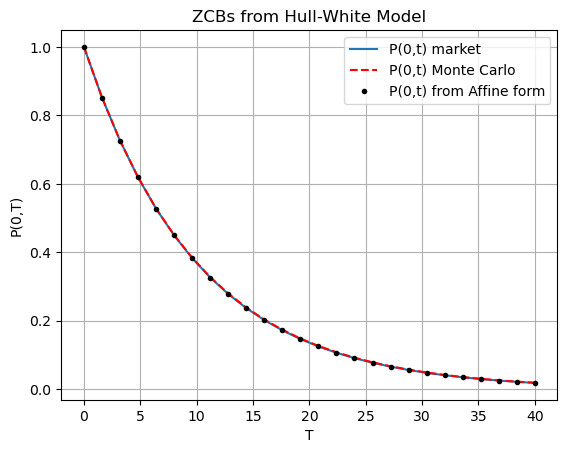

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# fowrd rate calculation

def  f0T(t,P0T):
    dt=0.01
    expr=-(np.log(P0T(t+dt))-np.log(P0T(t-dt)))/(2*dt)
    return expr

def GeneratePathsHWEuler(NoOfPaths,NoOfSteps,T,P0T, lambd, eta):   
    # intial intrest rate is forward rate t>0
    r0=f0T(0.01, P0T)
    theta = lambda t: 1.0/lambd * (f0T(t+dt, P0T)-f0T(t-dt, P0T))/(2.0*dt) + f0T(t, P0T) + eta*eta/(2.0*lambd*lambd)*(1.0-np.exp(-2.0*lambd*t))
 #theta = lambda t: 0.1 +t -t
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
    R = np.zeros([NoOfPaths, NoOfSteps+1])
    M = np.zeros([NoOfPaths, NoOfSteps+1])
    M[:,0]= 1.0
    R[:,0]= r0
    time = np.zeros([NoOfSteps+1]) 
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        R[:,i+1] = R[:,i] + lambd*(theta(time[i]) - R[:,i]) * dt + eta* (W[:,i+1]-W[:,i])
        M[:,i+1] = M[:,i] * np.exp((R[:,i+1]+R[:,i])*0.5*dt)
        time[i+1] = time[i] +dt
        
    # Outputs
    paths = {"time":time,"R":R,"M":M}
    return paths

def HW_theta(lambd,eta,P0T):
    dt=0.01
    theta =lambda t:1.0/lambd*(f0T(t+dt, P0T)-f0T(t-dt, P0T))/2.0*dt+f0T(t, P0T)+ eta*eta/(2.0*lambd*lambd)*(1.0-np.exp(-2.0*lambd*t))
    return theta

def HW_A(lambd,eta,P0T,T1,T2):
    tau = T2-T1
    zGrid = np.linspace(0.0,tau,250)
    B_r = lambda tau: 1.0/lambd * (np.exp(-lambd *tau)-1.0)
    theta = HW_theta(lambd,eta,P0T)    
    temp1 = lambd * integrate.trapz(theta(T2-zGrid)*B_r(zGrid),zGrid)  
    temp2 = eta*eta/(4.0*np.power(lambd,3.0)) * (np.exp(-2.0*lambd*tau)*(4*np.exp(lambd*tau)-1.0) -3.0) + eta*eta*tau/(2.0*lambd*lambd)
    return temp1 + temp2

def HW_B(lambd,eta,T1,T2):
    return 1.0/lambd *(np.exp(-lambd*(T2-T1))-1.0)

def HW_ZCB(lambd,eta,P0T,T1,T2,rT1):
    B_r = HW_B(lambd,eta,T1,T2)
    A_r = HW_A(lambd,eta,P0T,T1,T2)
    return np.exp(A_r + B_r *rT1)
    
def mainCalculation():
    NoOfPaths = 20000
    NoOfSteps = 25
       
    lambd = 0.04
    eta   = 0.01

    # We define a ZCB curve (obtained from the market)
    P0T = lambda T: np.exp(-0.1*T)   
    r0 = f0T(0.01,P0T)    
    
    # In this experiment we compare ZCB from the Market and Monte Carlo
    #"Monte Carlo part"   
    T = 40
    paths= GeneratePathsHWEuler(NoOfPaths,NoOfSteps,T,P0T, lambd, eta)
    M = paths["M"]
    ti = paths["time"]
    #dt = timeGrid[1]-timeGrid[0]
     # Here we compare the price of an option on a ZCB from Monte Carlo the Market  
    P_tMC = np.zeros([NoOfSteps+1])
    for i in range(0,NoOfSteps+1):
        P_tMC[i] = np.mean(1.0/M[:,i])
   
    # Analytical expression for ZCB using the Affine properties of the HW model
    P_tHW = np.zeros([NoOfSteps+1])
    for i in range(0,NoOfSteps+1):
        P_tHW[i] = HW_ZCB(lambd,eta,P0T,0.0,ti[i],r0)
        
    plt.figure(1)
    plt.grid()
    plt.xlabel('T')
    plt.ylabel('P(0,T)')
    plt.plot(ti,P0T(ti))
    plt.plot(ti,P_tMC,'--r')
    plt.plot(ti,P_tHW,'.k')
    plt.legend(['P(0,t) market','P(0,t) Monte Carlo','P(0,t) from Affine form'])
    plt.title('ZCBs from Hull-White Model')
    
mainCalculation()
    
    